In [12]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [13]:
#path = '../../output/weights/p_date=2022-10-09-09_03_36/log.json'
path = "C:/Users/elias/OneDrive/Desktop/log.json"

with open(path, 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

70001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [14]:
slice = 100000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss) + 100000
loss_filtered = { k: v for k, v in enumerate(loss) if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [15]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 2_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average (simple): {moving_average}")
    print()
    print(f"Moving Average: {percent_list}")
   
    print(f"Minimum: {min(data.values())}")

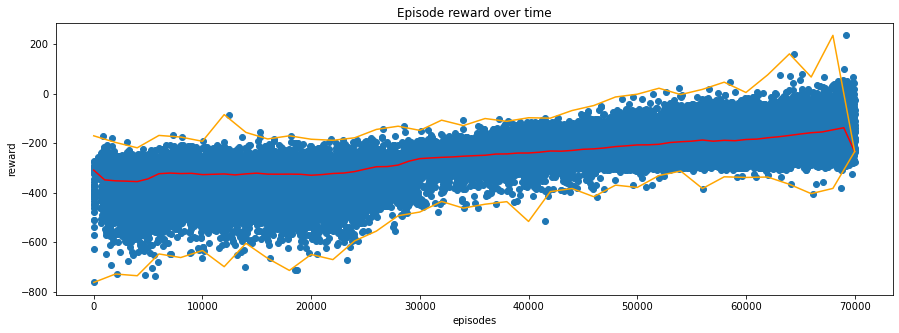

Maximum: 235.10000000000014
Average: -258.354139226585
Moving Average (simple): {0: -309.4, 1000: -348.6, 2000: -352.5, 3000: -353.9, 4000: -355.6, 5000: -344.5, 6000: -323.8, 7000: -321.1, 8000: -323.2, 9000: -322.2, 10000: -327.5, 11000: -326.1, 12000: -324.7, 13000: -328.6, 14000: -324.5, 15000: -321.5, 16000: -325.5, 17000: -325.7, 18000: -325.4, 19000: -326.0, 20000: -330.0, 21000: -327.3, 22000: -322.9, 23000: -321.0, 24000: -315.1, 25000: -305.1, 26000: -295.7, 27000: -294.9, 28000: -288.8, 29000: -273.1, 30000: -262.8, 31000: -260.1, 32000: -257.7, 33000: -256.0, 34000: -253.0, 35000: -251.0, 36000: -249.2, 37000: -244.3, 38000: -243.8, 39000: -240.3, 40000: -240.1, 41000: -237.0, 42000: -232.0, 43000: -232.8, 44000: -229.8, 45000: -225.2, 46000: -223.4, 47000: -219.6, 48000: -214.2, 49000: -211.1, 50000: -207.5, 51000: -207.1, 52000: -204.9, 53000: -197.9, 54000: -194.6, 55000: -192.3, 56000: -187.7, 57000: -192.5, 58000: -188.9, 59000: -190.5, 60000: -185.6, 61000: -184.0, 62

In [16]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

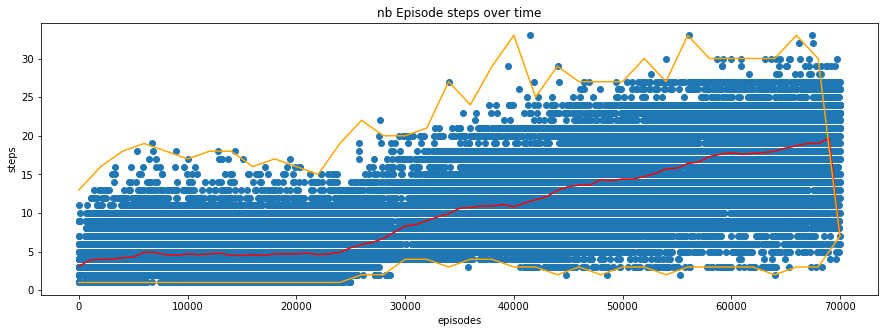

Maximum: 33
Average: 10.182368823302525
Moving Average (simple): {0: 3.1, 1000: 3.9, 2000: 4.0, 3000: 4.0, 4000: 4.2, 5000: 4.3, 6000: 4.9, 7000: 4.9, 8000: 4.6, 9000: 4.5, 10000: 4.7, 11000: 4.6, 12000: 4.7, 13000: 4.8, 14000: 4.5, 15000: 4.5, 16000: 4.6, 17000: 4.5, 18000: 4.7, 19000: 4.7, 20000: 4.7, 21000: 4.8, 22000: 4.6, 23000: 4.7, 24000: 4.9, 25000: 5.5, 26000: 5.9, 27000: 6.2, 28000: 6.7, 29000: 7.5, 30000: 8.3, 31000: 8.5, 32000: 9.0, 33000: 9.5, 34000: 9.9, 35000: 10.6, 36000: 10.7, 37000: 10.9, 38000: 10.9, 39000: 11.1, 40000: 10.8, 41000: 11.3, 42000: 11.7, 43000: 12.1, 44000: 12.9, 45000: 13.4, 46000: 13.6, 47000: 13.6, 48000: 14.3, 49000: 14.2, 50000: 14.4, 51000: 14.4, 52000: 14.7, 53000: 15.1, 54000: 15.7, 55000: 15.8, 56000: 16.4, 57000: 16.6, 58000: 17.3, 59000: 17.6, 60000: 17.8, 61000: 17.6, 62000: 17.7, 63000: 17.8, 64000: 18.0, 65000: 18.4, 66000: 18.7, 67000: 19, 68000: 19.0, 69000: 19.7, 70000: 7}

Moving Average: ['+25% (3.9 | 25%)', '+2% (4.0 | 29%)', '0% (4.

In [17]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

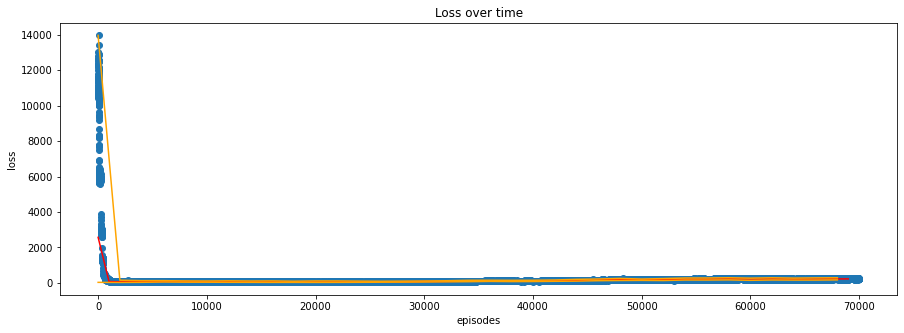

Maximum: 13965.0
Average: 158.41005647579811
Moving Average (simple): {0: 2570.6, 1000: 80.6, 2000: 62.3, 3000: 61.9, 4000: 66.4, 5000: 72.0, 6000: 82.2, 7000: 85.1, 8000: 77.2, 9000: 70.6, 10000: 64.4, 11000: 65.4, 12000: 64.0, 13000: 60.9, 14000: 58.9, 15000: 59.0, 16000: 59.8, 17000: 58.8, 18000: 58.8, 19000: 57.8, 20000: 55.1, 21000: 55.8, 22000: 57.5, 23000: 56.3, 24000: 56.3, 25000: 60.1, 26000: 63.1, 27000: 61.6, 28000: 63.7, 29000: 69.2, 30000: 79.3, 31000: 80.0, 32000: 83.7, 33000: 90.1, 34000: 94.2, 35000: 108.6, 36000: 113.7, 37000: 116.1, 38000: 110.5, 39000: 114.6, 40000: 110.3, 41000: 116.9, 42000: 116.9, 43000: 122.1, 44000: 137.0, 45000: 149.3, 46000: 162.3, 47000: 176.6, 48000: 179.6, 49000: 177.3, 50000: 174.0, 51000: 179.6, 52000: 176.8, 53000: 185.1, 54000: 205.3, 55000: 212.4, 56000: 208.8, 57000: 221.8, 58000: 224.3, 59000: 225.0, 60000: 220.2, 61000: 218.2, 62000: 222.0, 63000: 218.0, 64000: 214.7, 65000: 212.9, 66000: 216.2, 67000: 225.8, 68000: 224.7, 69000: 22

In [18]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

In [11]:
#plot(mae_filtered, "Mae over time", "episodes", "mae")

In [9]:
#plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

In [10]:
#plot(duration, "Duration over time", "episodes", "duration")

In [11]:
#plot(accuracy, "accuracy over time", "accuracy", "steps")